In [83]:
import pandas as pd
import csv
with open('train_data.txt', 'r', encoding='utf-8', errors='replace') as txt_file:
    lines=txt_file.readlines()
with open('train_data.csv', 'w', newline='', encoding='utf-8') as csv_file:
    writer=csv.writer(csv_file)
    writer.writerow(['serial no.', 'movie_name', 'genre', 'description'])

    for line in lines:
        fields=line.strip().split(' ::: ')
        writer.writerow(fields)

In [84]:
data1=pd.read_csv('train_data.csv')

In [85]:
with open('test_data.txt', 'r', encoding='utf-8', errors='replace') as txt_file:
    lines=txt_file.readlines()
with open('test_data.csv', 'w', newline='', encoding='utf-8') as csv_file:
    writer=csv.writer(csv_file)
    writer.writerow(['serial no.', 'movie_name', 'description'])

    for line in lines:
        fields=line.strip().split(' ::: ')
        writer.writerow(fields)

In [86]:
data2=pd.read_csv('test_data.csv')

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import string
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [88]:
train_data=pd.read_csv('train_data.csv')

In [89]:
print(train_data.describe())

         serial no.
count  54214.000000
mean   27107.500000
std    15650.378084
min        1.000000
25%    13554.250000
50%    27107.500000
75%    40660.750000
max    54214.000000


In [90]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   serial no.   54214 non-null  int64 
 1   movie_name   54214 non-null  object
 2   genre        54214 non-null  object
 3   description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None


In [91]:
train_data.head(2)

,serial no.,movie_name,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...


In [92]:
print(train_data.isnull().sum())

serial no.     0
movie_name     0
genre          0
description    0
dtype: int64


In [93]:
test_data=pd.read_csv('test_data.csv')

In [94]:
print(test_data.describe())

         serial no.
count  54200.000000
mean   27100.500000
std    15646.336632
min        1.000000
25%    13550.750000
50%    27100.500000
75%    40650.250000
max    54200.000000


In [95]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   serial no.   54200 non-null  int64 
 1   movie_name   54200 non-null  object
 2   description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


In [96]:
print(test_data.isnull().sum())

serial no.     0
movie_name     0
description    0
dtype: int64


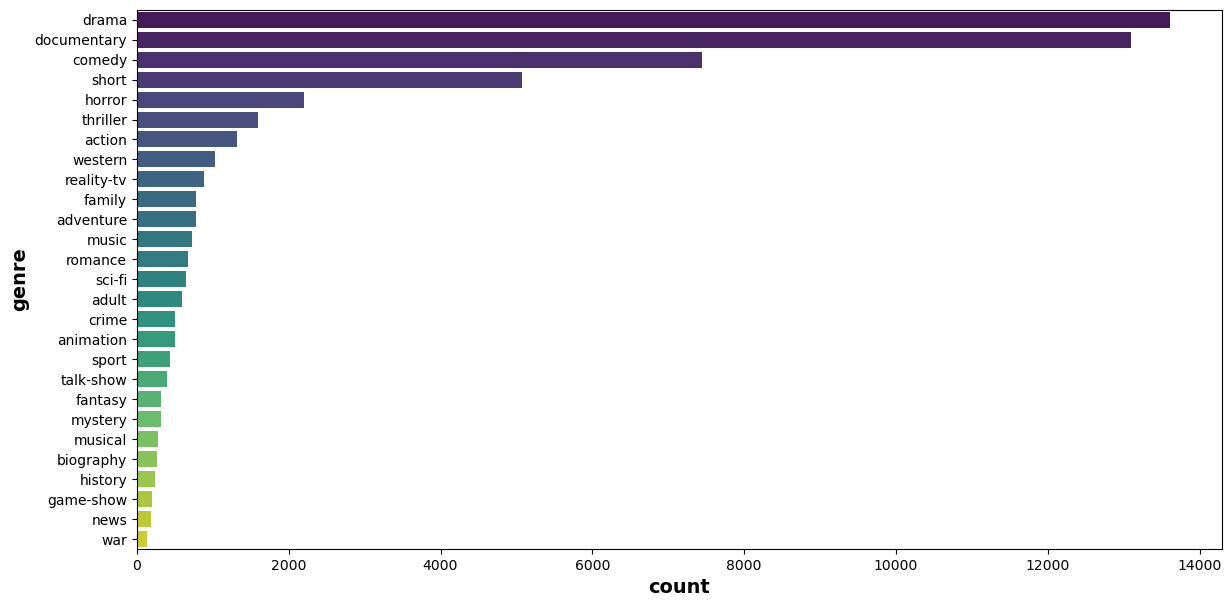

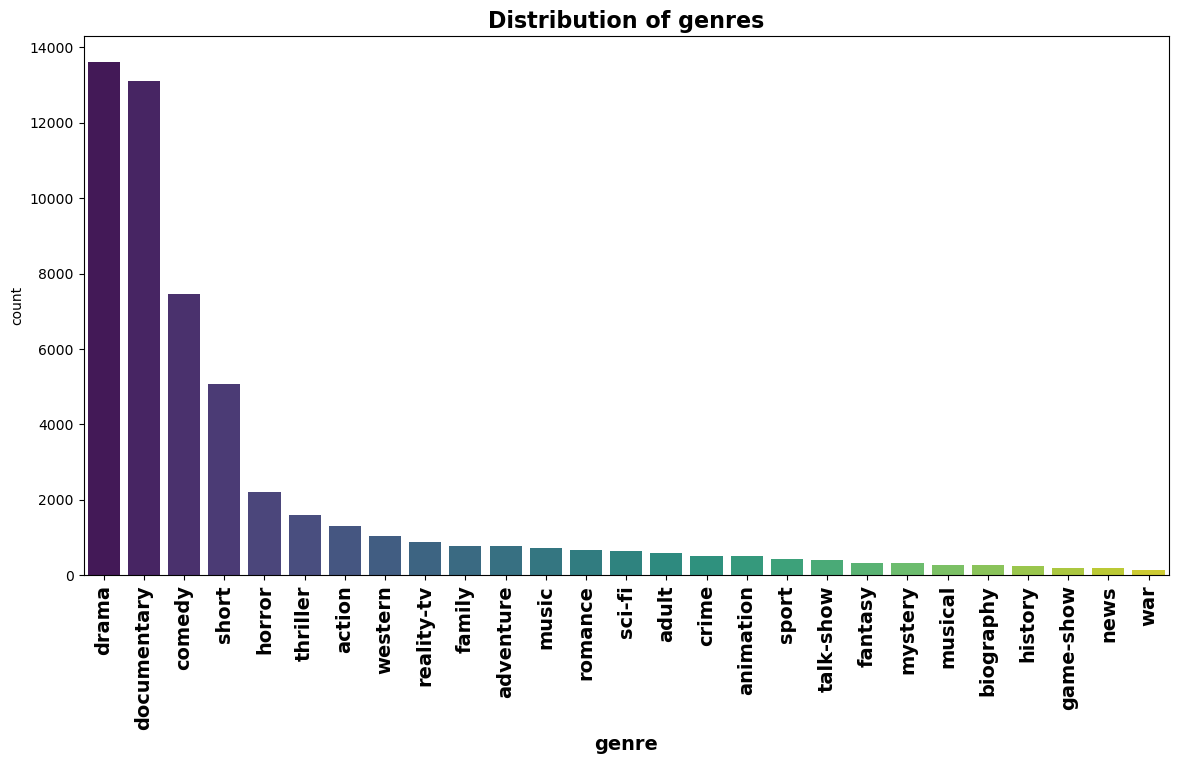

In [97]:
plt.figure(figsize=(14,7))
sns.countplot(data=train_data, y='genre', order=train_data['genre'].value_counts().index, palette='viridis')
plt.xlabel('count', fontsize=14, fontweight='bold')
plt.ylabel('genre', fontsize=14, fontweight='bold')

plt.figure(figsize=(14,7))
counts=train_data['genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('genre', fontsize=14, fontweight='bold')
plt.title('Distribution of genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [98]:
stemmer=LancasterStemmer()
stop_words=set(stopwords.words('english'))

def clean_text(text):
    words=nltk.word_tokenize(text)
    stopwords=nltk.corpus.stopwords.words('english')
    text=re.sub("\s[\s]+", " ", text).strip()
    return text

train_data['Text_cleaning']=train_data['description'].apply(clean_text)
test_data['Text_cleaning']=test_data['description'].apply(clean_text)

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


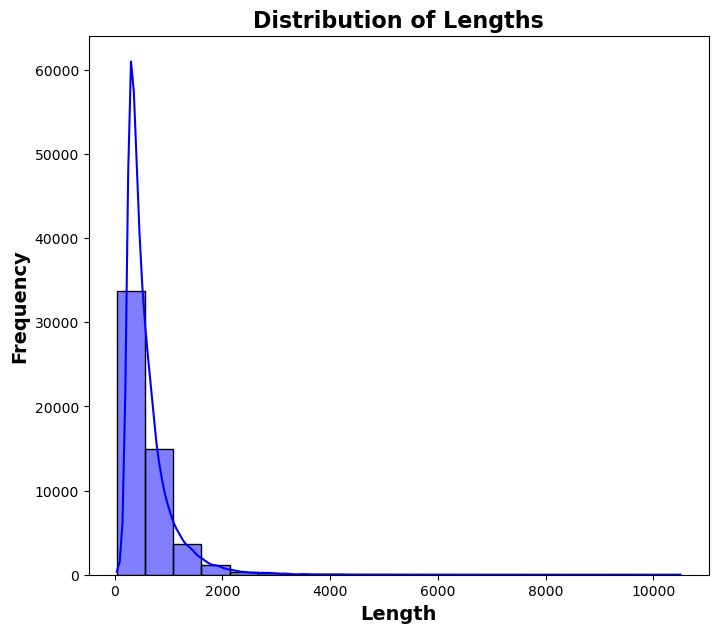

In [99]:
train_data['length_Text_cleaning']=train_data['Text_cleaning'].apply(len)

plt.figure(figsize=(8,7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

In [100]:
tfidf_vectorizer=TfidfVectorizer()
x_train=tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])
x_test=tfidf_vectorizer.transform(test_data['Text_cleaning'])

In [101]:
x=x_train
y=train_data['genre']
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val=train_test_split(x, y, test_size=0.2, random_state=42)

classifier=MultinomialNB()
classifier.fit(x_train, y_train)

y_pred=classifier.predict(x_val)

accuracy=accuracy_score(y_val, y_pred)
print("validation accuracy: ", accuracy)
print(classification_report(y_val, y_pred))

validation accuracy:  0.44507977497002676
              precision    recall  f1-score   support

      action       0.00      0.00      0.00       263
       adult       0.00      0.00      0.00       112
   adventure       0.00      0.00      0.00       139
   animation       0.00      0.00      0.00       104
   biography       0.00      0.00      0.00        61
      comedy       0.57      0.03      0.06      1443
       crime       0.00      0.00      0.00       107
 documentary       0.54      0.90      0.67      2659
       drama       0.38      0.89      0.53      2697
      family       0.00      0.00      0.00       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.00      0.00      0.00        40
     history       0.00      0.00      0.00        45
      horror       0.00      0.00      0.00       431
       music       0.00      0.00      0.00       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0.00      

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
x_test_predictions=classifier.predict(x_test)
test_data['predicted_genre']=x_test_predictions

In [103]:
test_data.to_csv('predicted_genre.csv', index=False)
print(test_data)

       serial no.                      movie_name  \
0               1            Edgar's Lunch (1998)   
1               2        La guerra de papá (1977)   
2               3     Off the Beaten Track (2010)   
3               4          Meu Amigo Hindu (2015)   
4               5               Er nu zhai (1955)   
...           ...                             ...   
54195       54196  "Tales of Light & Dark" (2013)   
54196       54197     Der letzte Mohikaner (1965)   
54197       54198             Oliver Twink (2007)   
54198       54199               Slipstream (1973)   
54199       54200       Curitiba Zero Grau (2010)   

                                             description  \
0      L.R. Brane loves his life - his car, his apart...   
1      Spain, March 1964: Quico is a very naughty chi...   
2      One year in the life of Albin and his family o...   
3      His father has died, he hasn't spoken with his...   
4      Before he was known internationally as a marti...   
...

In [3]:
import pandas as pd
import csv
with open('test_data_solution.txt', 'r', encoding='utf-8', errors='replace') as txt_file:
    lines=txt_file.readlines()
with open('test_data_solution.csv', 'w', newline='', encoding='utf-8') as csv_file:
    writer=csv.writer(csv_file)
    writer.writerow(['serial no.', 'movie_name', 'genre', 'description'])

    for line in lines:
        fields=line.strip().split(' ::: ')
        writer.writerow(fields)

In [7]:
data3=pd.read_csv('test_data_solution.csv')

In [109]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   serial no.   54200 non-null  int64 
 1   movie_name   54200 non-null  object
 2   genre        54200 non-null  object
 3   description  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [107]:
print(data3.describe())

         serial no.
count  54200.000000
mean   27100.500000
std    15646.336632
min        1.000000
25%    13550.750000
50%    27100.500000
75%    40650.250000
max    54200.000000


In [9]:
data3.head(5)

,serial no.,movie_name,genre,description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...
